In [1]:
from qibocal.protocols import ramsey
from qibocal.protocols.ramsey.utils import ramsey_fit
import matplotlib.pyplot as plt
from pathlib import Path

OLD = Path("monitor_before_D3/data/ramsey-0/")
NEW = Path("monitor_after_D3/data/ramsey-0/")

[Qibo 0.2.11|INFO|2024-09-24 11:39:56]: Loading platform dummy


In [2]:
data_old = ramsey.data_type.load(OLD)["D3"]
data_new = ramsey.data_type.load(NEW)["D3"]

In [3]:
fit_old = ramsey.results_type.load(OLD).fitted_parameters["D3"]
fit_new = ramsey.results_type.load(NEW).fitted_parameters["D3"]

In [5]:
BLUE = "#788ae3"
RED = "#d1545e"

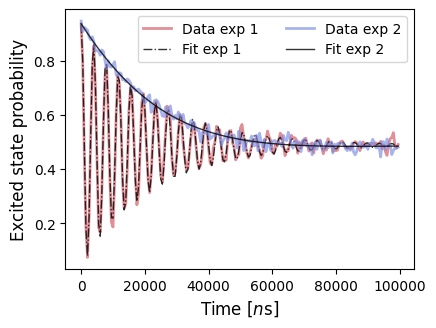

In [7]:
width = 0.5
plt.figure(figsize=(9*width, 9*width*6/8))
plt.plot(data_old.wait, data_old.prob, color=RED, lw=2, alpha=0.65, label="Data exp 1")
plt.plot(data_old.wait, ramsey_fit(data_old.wait, *fit_old), color="black", lw=1, ls="-.", alpha=0.8, label="Fit exp 1")
plt.plot(data_new.wait, data_new.prob, color=BLUE, lw=2, alpha=0.65, label="Data exp 2")
plt.plot(data_new.wait, ramsey_fit(data_new.wait, *fit_new), color="black", lw=1, ls="-", alpha=0.8, label="Fit exp 2")
plt.ylabel("Excited state probability", fontsize=12)
plt.xlabel(r"Time [$n$s]", fontsize=12)
plt.legend(ncols=2)
plt.savefig("qq_compare.pdf", bbox_inches="tight")